# The threshold $\alpha_{\mathrm{SAT}}(\tau)$ 

For fluctuating norm vectors, we have $\|\mathbf{x}_\mu\|^2 = d + \Delta \sqrt{d}$, and $\mathbb{E}[\Delta] = 0$, $\mathbb{E}[\Delta^2] = \tau$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import root_scalar
colors = list(mcolors.TABLEAU_COLORS)
plt.rcParams.update({'font.size': 15})

We define the functions $G_k(X)$ as: 

$G_k(X) = \int_{-X}^2 \rho_{\mathrm{s.c.}}(v) [v+X]^k \mathrm{d} v$

In [2]:
def G0(X):
    if X <= -2:
        return 0.
    elif X >= 2:
        return 1.
    else: 
        arg = np.arcsin(np.sqrt(2.+X)/2.)
        return (X*np.sqrt(4.-X**2) + 8*arg)/(4*np.pi)
    
def G1(X):
    if X <= -2:
        return 0.
    elif X >= 2:
        return X
    else: 
        arg = np.arcsin(np.sqrt(2.+X)/2.)
        return ((8.+X**2)*np.sqrt(4.-X**2) + 24.*X*arg)/(12*np.pi)
    
def G2(X):
    if X <= -2:
        return 0.
    elif X >= 2:
        return 1.+X**2
    else: 
        arg = np.arcsin(np.sqrt(2.+X)/2.)
        return ((26.+X**2)*X*np.sqrt(4.-X**2) + 48.*(1+X**2)*arg)/(24*np.pi)

In [3]:
def Xf(tau):
    sol = root_scalar(lambda x: x - (1.-tau/2)*G1(x), x0 = 1)
    return sol.root

def alphaSAT(tau):
    Xv = Xf(tau) 
    return -(1./2)*(1.-tau/2)*G1(Xv)**2 + (1./2)*G2(Xv)

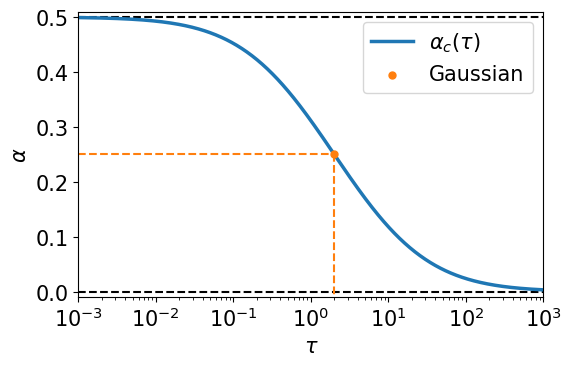

In [4]:
width = 6
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio
fig, ax = plt.subplots(1, 1,figsize = (width,height))

#Log scale 
taus = 10**np.linspace(-3,3, num = 1000)
alphas = np.array([alphaSAT(tau) for tau in taus])
ax.plot(taus, alphas, label = r'$\alpha_c(\tau)$', linewidth = 2.5)

ax.plot([np.amin(taus), np.amax(taus)],[0,0], '--', linewidth=1.5, zorder=0, color='black')
ax.plot([np.amin(taus), np.amax(taus)],[0.5,0.5], '--', linewidth=1.5, zorder=0, color='black')
ax.plot([np.amin(taus), 2],[0.25,0.25], '--', linewidth=1.5, zorder=0, color=colors[1])
ax.plot([2, 2],[0.25,-1], '--', linewidth=1.5, zorder=0, color=colors[1])
ax.scatter([2],[0.25], s=25, marker = 'o', zorder=3, color=colors[1], label = r'Gaussian')


ax.set_ylabel(r'$\alpha$')
ax.set_xlabel(r'$\tau$')
ax.legend(fancybox=True,loc = 'upper right')
ax.set_ylim(-0.01,0.51)
ax.set_xscale('log')
ax.set_xlim(np.amin(taus), np.amax(taus))

plt.savefig('../Figures/alphac_tau.pdf', bbox_inches='tight')

# Plot of the spectral density

We show the spectral density at the transition, for some values of $\tau$.

In [5]:
def sc(x):
    if np.abs(x) >= 2:
        return 0.
    else:
        return np.sqrt(4.-x**2)/(2*np.pi)

def m(tau):
    return 1. - tau/2

def sigma(tau): 
    return 1./(G1(Xf(tau)))

def mu(tau):
    #Return the whole density, plus the weight in 0
    Xv = Xf(tau)
    m = 1. - tau/2
    sigma =  1./G1(Xv)
    omega = 1 - G0(Xv)
    xmax = m + 2*sigma
    xs = np.linspace(0, xmax, num = 10000)
    values = (1./sigma)*np.array([sc((x-m)/sigma) for x in xs])
    return {'omega':omega, 'xs':xs, 'mus':values}

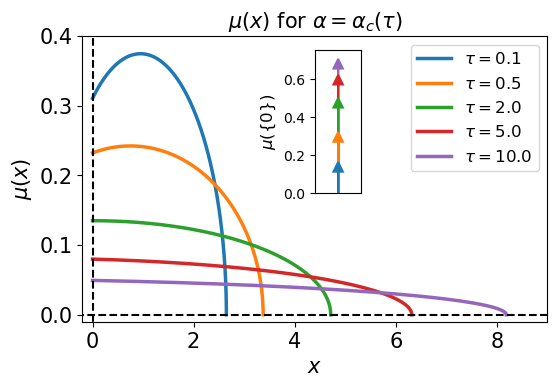

In [6]:
width = 6
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio
fig, ax = plt.subplots(1, 1,figsize = (width,height))

taus = np.array([0.1, 0.5, 2, 5, 10])
axins = ax.inset_axes([0.5, 0.45, 0.1, 0.5])
axins.tick_params(axis='x', labelsize=10)
axins.tick_params(axis='y', labelsize=10)
axins.set_xticks([])
axins.set_xlim(-1,1)
axins.set_ylim(0,0.75)
axins.set_ylabel(r'$\mu(\{0\})$', fontsize = 12)

for (i_t, tau) in enumerate(taus):
    res = mu(tau)
    ax.plot(res['xs'], res['mus'], label = r'$\tau = {0}$'.format(tau), linewidth = 2.5, color = colors[i_t])
    axins.arrow(0, 0, 0, res['omega'], head_width = 0.4, head_length = 0.05, length_includes_head = True, color = colors[i_t], linewidth = 1.5, zorder = np.size(taus) - i_t)

ax.plot([-100,100],[0.,0.], '--', linewidth=1.5, zorder=4, color='black')
ax.plot([0,0],[-10,10], '--', linewidth=1.5, zorder=4, color='black')
ax.set_ylabel(r'$\mu(x)$')
ax.set_xlabel(r'$x$')
ax.set_ylim(-0.01,0.4)
ax.set_xlim(-0.2,9)
ax.set_title(r'$\mu(x)$ for $\alpha = \alpha_c(\tau)$', fontsize = 15)
ax.legend(fancybox=True,loc = 'upper right', fontsize = 12)

plt.savefig('../Figures/mu_alphac_tau.pdf', bbox_inches='tight')